<a href="https://colab.research.google.com/github/RedSnow389/Coordinator-Task-1/blob/main/IPL_Predictions_Rajeev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coordinator Task 1**

Welcome to the first coordinator task bois!!

This time we have a task tailored specifically for you guys, not a house price prediction task, not a cat-dog classification task but something much more interesting!

## **IPL result prediction task!**

Yes, you are right. Predict the *scripted* IPL matches using your ML skills! We have shared the IPL dataset spanning from the year 2008-2021. You are expected to predict the results for the year 2022. 

**Task** : Predict the winner of every match conducted in 2023 based on the dataset that we have shared. The coordinator(s) whose model predicts with highest accuracy will be given a treat.

**Instructions**


*   The coordinator task has two sub-parts: 
 
      1.   EDA (Exploratory Data Analysis)
      2. Data preprocessing
      3.   Model building and training 
 

*   The notebook is designed and categorized accordingly to help you throughout this task
*   For EDA you are expected to use Pandas, Numpy, Matplotlib, Seaborn wherever neccessary. (you are free to use any other Python libraries as well)
*   For the model building, use only linear/logistic regression 
*   You are not allowed to use Pytorch. Build the model from scratch using Numpy


**Note**: We don't expect you to check the 2022 IPL results, be fair and submit your model predictions.

Be as creative as possible, guys; we have given you a raw dataset, as you will have much more scope in exploring the problem statement. Enjoy the task!

# Downloading the dataset

The dataset is a CSV file. First download it onto your local system and upload it on your colab notebook. Use Pandas to open the CSV file and study the dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
raw_df = pd.read_csv('/content/IPL_train_ dataset 2008-2021.csv')
test_ds=pd.read_csv('/content/Test_dataset.csv')

# Data Analysis

Analyze the raw_df. Use Pandas to make observations. Feel free to use Google or Chatgpt for the same. So many functions can be performed using Pandas and remembering them isn't possible. So give the right prompt as you require and use those commands.

The next few cells are left for you guys to experiment

We have coded a few cells to give you an idea.

In [ ]:
raw_df.replace(to_replace="RCB", value="Royal Challengers Bangalore",inplace=True)
raw_df.replace(to_replace="Capitals", value="Delhi Capitals",inplace=True)
raw_df.replace(to_replace="KKR", value="Kolkata Knight Riders",inplace=True)
raw_df.replace(to_replace="Punjab", value="Punjab Kings",inplace=True)
raw_df.replace(to_replace="Mumbai", value="Mumbai Indians",inplace=True)
raw_df.replace(to_replace="Royals", value="Rajasthan Royals",inplace=True)
raw_df.replace(to_replace="Super", value="Chennai Super Kings",inplace=True)
raw_df.replace(to_replace="Sunrisers", value="Sunrisers Hyderabad",inplace=True)
raw_df.replace(to_replace="Kings", value="Kings XI Punjab",inplace=True)
raw_df.replace(to_replace="Daredevils", value="Delhi Daredevils",inplace=True)
raw_df.replace(to_replace=["Supergiant","Supergiants"], value="Rising Pune Supergiants",inplace=True)
raw_df.replace(to_replace="Guj", value="Gujarat Lions",inplace=True)
raw_df.replace(to_replace="Warriors", value="Pune Warriors",inplace=True)
raw_df.replace(to_replace="Chargers", value="Deccan Chargers",inplace=True)
raw_df.replace(to_replace="Kochi", value="Kochi Tuskers Kerala",inplace=True)

In [ ]:
raw_df.replace(to_replace="Kings XI Punjab", value="Punjab Kings",inplace=True)
raw_df.replace(to_replace="Delhi Daredevils", value="Delhi Capitals",inplace=True)
raw_df.replace(to_replace="Deccan Chargers", value="Sunrisers Hyderabad",inplace=True)

# KXIP and PBKS were owned by the same franchise. Same goes for DD and DC.

In [ ]:
test_ds=test_ds.drop('place', axis=1)
combined_df=pd.concat([raw_df, test_ds], axis=0, ignore_index=True)
combined_df = combined_df.drop(['man_of_the_match','place','year '], axis=1)

In [ ]:
combined_df['toss_choice']= label_encoder.fit_transform(combined_df['toss_choice'])
combined_df['stadium']= label_encoder.fit_transform(combined_df['stadium'])

In [ ]:
raw_df=combined_df[:len(raw_df)]
test_ds=combined_df[len(raw_df):]

In [ ]:
test_ds=test_ds.drop(['team1_score','team2_score','winner','margin'], axis=1)

In [ ]:
raw_df=raw_df[raw_df['stadium']!='PLAYER NAMEOMRWEcon']
raw_df=raw_df[raw_df['winner']!='No']
raw_df=raw_df[raw_df['winner']!='Tied']
raw_df=raw_df[raw_df['winner']!='Match']

You can also discard the matches which were tied/abandoned

#Data Visualization

Use Matplotlib and Seaborn to plot graphs to visualize the dataset. Plot pie charts, histograms, and scatterplots to analyze and present the data understandably.

Take help of this notebook to proceed ahead
https://www.kaggle.com/code/razamh/eda-ipl-dataset

Using the plots answer the following questions:


1.   Number of matches won by each team
2.   Percentage of matches in which first batting and second batting team has won
3.   Number of man of the matches won per player (plot for first 10 players)
4.   Number of matches conducted in each year 
5.   Number of matches in each venue
6.   Number of champions won per team (hint: the last match of every season is the final)
7. Average score of the first batting team in each venue


  We have helped you with the first question, answer the remaining the questions. 





In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
raw_df.winner.unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Mumbai Indians',
       'Rajasthan Royals', 'Chennai Super Kings', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

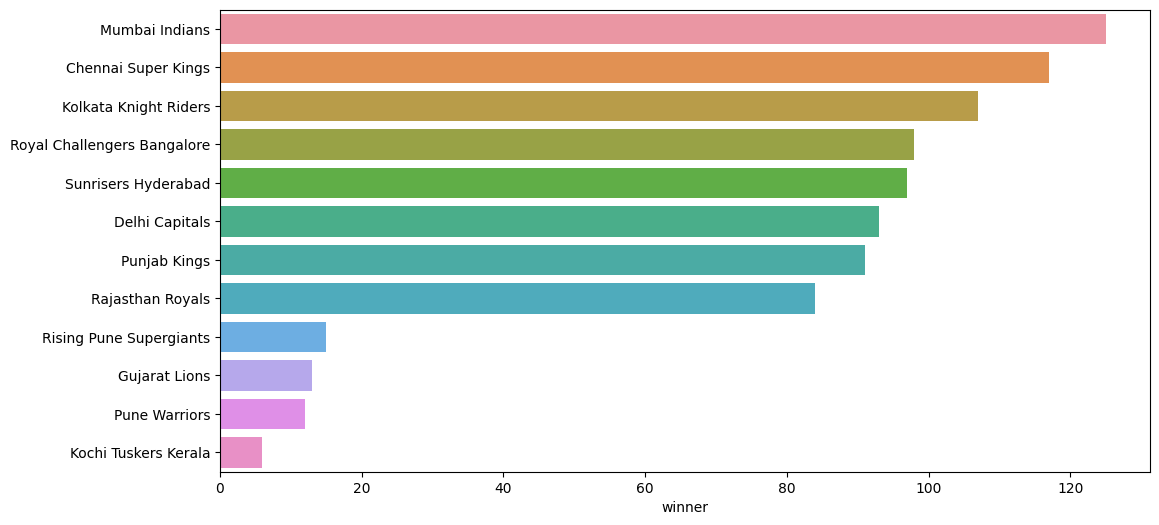

In [ ]:
plt.figure(figsize=(12,6))
data = raw_df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

In [ ]:
#I unfortunatelly forgot the plotting, but it is not needed for my final answer.

#Data Preprocessing

We have to clean the data and preprocess it to convert it into a trainable format.

For that you have to get rid of the NaN values, remove the un-neccesary parameters and also use feature engineering wherever required.

Data preprocessing is essential for the performance of the model, the better parameters you define/retain the better model can learn and hence perform.



In [ ]:
new_data=raw_df.copy()
new_data=new_data.drop(columns =['margin','winner'], axis=1) 

In [ ]:
class Transform:
  def __init__(self, data):
      self.data = data

  def filter_by_team(self, string):
      self.subset = self.data.loc[((self.data['team1'] == string) | (self.data['team2'] == string))]

      self.subset.reset_index(inplace = True)

      team_score = []
      for i in range(len(self.subset)):
        if self.subset['team1'].values[i] == string:
          team_score.append(self.subset['team1_score'].values[i])
        else:
          team_score.append(self.subset['team2_score'].values[i])

      self.subset.drop(columns =['team1_score','team2_score','index'], axis=1, inplace=True)

      for i in range(len(self.subset)):
        if self.subset['toss_winner'].values[i] == string:
          self.subset['toss_winner'].values[i] = 1
        else:
          self.subset['toss_winner'].values[i] = 0

      opponent_team = []
      for i in range(len(self.subset)):
        if self.subset['team1'].values[i] != string:
          opponent_team.append(self.subset['team1'].values[i])
        else:
          opponent_team.append(self.subset['team2'].values[i])

      self.subset['Opponent_Team'] = opponent_team
      self.subset.drop(columns =['team1','team2'], axis=1, inplace=True)
      self.subset['Team_score'] = team_score
      self.subset['Opponent_Team']= label_encoder.fit_transform(self.subset['Opponent_Team'])
      self.subset = self.subset.dropna()

      return self.subset

In [ ]:
RCB_df=Transform(new_data)
RCB_df=RCB_df.filter_by_team('Royal Challengers Bangalore')
MI_df=Transform(new_data)
MI_df=MI_df.filter_by_team('Mumbai Indians')
CSK_df=Transform(new_data)
CSK_df=CSK_df.filter_by_team('Chennai Super Kings')
GL_df=Transform(new_data)
GL_df=GL_df.filter_by_team('Gujarat Lions')
RR_df=Transform(new_data)
RR_df=RR_df.filter_by_team('Rajasthan Royals')
PBKS_df=Transform(new_data)
PBKS_df=PBKS_df.filter_by_team('Punjab Kings')
DC_df=Transform(new_data)
DC_df=DC_df.filter_by_team('Delhi Capitals')
KKR_df=Transform(new_data)
KKR_df=KKR_df.filter_by_team('Kolkata Knight Riders')
RPS_df=Transform(new_data)
RPS_df=RPS_df.filter_by_team('Rising Pune Supergiants')
SRH_df=Transform(new_data)
SRH_df=SRH_df.filter_by_team('Sunrisers Hyderabad')
PW_df=Transform(new_data)
PW_df=PW_df.filter_by_team('Pune Warriors')
KTK_df=Transform(new_data)
KTK_df=KTK_df.filter_by_team('Kochi Tuskers Kerala')

<ipython-input-83-a90e639b3a72>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.subset.drop(columns =['team1_score','team2_score','index'], axis=1, inplace=True)
<ipython-input-83-a90e639b3a72>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.subset['Opponent_Team'] = opponent_team
<ipython-input-83-a90e639b3a72>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self

#Model building and training

The dataset given is only for training. After training your model a testing dataset will be shared on which your model is expected to predict outputs.

The task is to predict the winners of the matches given the two teams, venue, and toss_winner. Accordingly, you have to decide the parameters to be taken into consideration for training the model.

The training dataset is IPL dataset for 2008-2021. A general practice while Training is splitting your dataset into training and validation datasets.

You can use only numpy, build a linear/logistic regression from scratch and train it. 

An idea to get started is to fit a linear regressor to predict the score of both the teams and the team with greater score will win.

You can come up with any other idea as well.

For reference check this article https://medium.com/analytics-vidhya/simple-linear-regression-with-example-using-numpy-e7b984f0d15e

Another reference article which you guys can look into:


https://www.analyticsvidhya.com/blog/2021/10/building-an-ipl-score-predictor-end-to-end-ml-project/

In [ ]:
class LinearRegression:
    def __init__(self, data):
        self.coefficients = None
        self.intercept = None
        self.X = data[['toss_winner','toss_choice','stadium','Opponent_Team']].values
        self.y = data[['Team_score']].values

        self.X = self.X.astype('float64')
        self.y = self.y.astype('float64')

        # Add a column of ones to X for the intercept term
        self.X = np.c_[np.ones(self.X.shape[0]), self.X]

        # Compute the coefficients using the normal equation
        X_transpose_X = np.dot(self.X.T, self.X)
        X_transpose_y = np.dot(self.X.T, self.y)
        self.coefficients = np.linalg.solve(X_transpose_X, X_transpose_y)

        # Extract the intercept and coefficients
        self.intercept = self.coefficients[0]
        self.coefficients = self.coefficients[1:]

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
           X = X.values

        X = X.T

        #Add a column of ones to X for the intercept term.
        X = np.c_[np.ones(X.shape[0]), X]

        # Compute the predictions
        y_pred = np.dot(X, np.concatenate(([self.intercept], self.coefficients)))

        return y_pred

In [ ]:
RCB_mo = LinearRegression(RCB_df)
df = pd.DataFrame([1, 0, 37, 8])
print(RCB_mo.predict(df))

[[146.02113775]]


In [ ]:
class Score:
  def score(string, input, string_2):
    if(string == 'Royal Challengers Bangalore'): 
      encoded_number = label_encoder.transform([string_2])[0]
      new_input = input + (encoded_number,)
      model = LinearRegression(RCB_df)
    if(string == 'Chennai Super Kings'):
      encoded_number = label_encoder.transform([string_2])[0]
      new_input = input + (encoded_number,)
      model = LinearRegression(CSK_df)
    if(string == 'Mumbai Indians'):
      encoded_number = label_encoder.transform([string_2])[0]
      new_input = input + (encoded_number,)
      model = LinearRegression(MI_df)
    if(string == 'Rajasthan Royals'):
      encoded_number = label_encoder.transform([string_2])[0]
      new_input = input + (encoded_number,)
      model = LinearRegression(RR_df)
    if(string == 'Gujarat Titans'): 
      encoded_number = label_encoder.transform([string_2])[0]
      new_input = input + (encoded_number,)
      model = LinearRegression(GL_df)
    if(string == 'Kolkata Knight Riders'): 
      encoded_number = label_encoder.transform([string_2])[0]
      new_input = input + (encoded_number,)
      model = LinearRegression(KKR_df)
    if(string == 'Punjab Kings'): 
      encoded_number = label_encoder.transform([string_2])[0]
      new_input = input + (encoded_number,)
      model = LinearRegression(PBKS_df)
    if(string == 'Delhi Capitals'): 
      encoded_number = label_encoder.transform([string_2])[0]
      new_input = input + (encoded_number,)
      model = LinearRegression(DC_df)
    if(string == 'Sunrisers Hyderabad'): 
      encoded_number = label_encoder.transform([string_2])[0]
      new_input = input + (encoded_number,)
      model = LinearRegression(SRH_df)

    new_input = pd.DataFrame(new_input)

    return model.predict(new_input)

In [ ]:
class find_winner:
  def __init__(self):
    self.score1 = []
    self.score2 = []
    self.predictions = []

  def solve(self, test_data):
    test_data_2 = test_data

    for index, row in test_data.iterrows():
      if row['team1'] == row['toss_winner']:
        test_data_2.loc[index, 'toss_winner'] = 1
      else:
        test_data_2.loc[index, 'toss_winner'] = 0

    selected_inputs = ['toss_winner','toss_choice','stadium']

    for index, row in test_data_2.iterrows():
      inputs_tuple = tuple(row[input] for input in selected_inputs)
      self.score1.append(Score.score(row['team1'], inputs_tuple, row['team2']))

    for index, row in test_data_2.iterrows():
      row['toss_winner'] = 1 - row['toss_winner']

    selected_inputs = ['toss_winner','toss_choice','stadium']
      
    for index, row in test_data_2.iterrows():
      inputs_tuple = tuple(row[input] for input in selected_inputs)
      self.score2.append(Score.score(row['team2'], inputs_tuple, row['team1']))

    for i in range(len(test_data)):
      if self.score1[i] > self.score2[i]:
        self.predictions.append(1)
      elif self.score1[i] < self.score2[i]:
        self.predictions.append(2)

    return self.predictions

In [ ]:
predictor = find_winner()
my_predictions = predictor.solve(test_ds)

In [ ]:
file_path = '/content/submission.csv'

# Save the DataFrame to a CSV file
submission_ds.to_csv(file_path, index=False)


In [ ]:
submission_df=pd.read_csv('/content/submission_csv.csv')

In [ ]:
submission_df

,team1,team2,prediction
0,Chennai Super Kings,Kolkata Knight Riders,1
1,Mumbai Indians,Delhi Capitals,1
2,Royal Challengers Bangalore,Punjab Kings,1
3,Rajasthan Royals,Sunrisers Hyderabad,2
4,Kolkata Knight Riders,Royal Challengers Bangalore,2
5,Punjab Kings,Kolkata Knight Riders,1
6,Rajasthan Royals,Mumbai Indians,2
7,Punjab Kings,Chennai Super Kings,2
8,Rajasthan Royals,Royal Challengers Bangalore,2
9,Mumbai Indians,Kolkata Knight Riders,1
